In [1]:
%load_ext autoreload
%autoreload 2

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from circuit_toolkit.plot_utils import saveallforms

In [84]:
FMfigdir = "/Users/binxuwang/Library/CloudStorage/OneDrive-HarvardUniversity/Manuscript_DiffusionLearningCurve/Figures/Figure_theory_curves/flowmatching_theory_figures"

### Weight learning dynamics

In [85]:
import numpy as np

def compute_weight_coefficient_flowmatching_onelayer(tau, t, lam_k, Q_k, eta=1.0):
    """
    Compute the expression:
    
      (t*lam_k - (1-t))/(t**2*lam_k + (1-t)**2) + 
      (Q_k - (t*lam_k - (1-t))/(t**2*lam_k + (1-t)**2)) * exp(-2*eta*tau*(t**2*lam_k + (1-t)**2))
      
    Parameters:
        tau  : float
        t    : float
        lam_k: float, represents λ_k
        Q_k  : float
        eta  : float
        
    Returns:
        The computed value as a float.
    """
    denominator = t**2 * lam_k + (1 - t)**2
    fraction = (t * lam_k - (1 - t)) / denominator
    exponential_term = np.exp(-2 * eta * tau * denominator)
    result = fraction + (Q_k - fraction) * exponential_term
    return result

# Example usage:
if __name__ == "__main__":
    # Example values:
    t = 0.5
    lam_k = 2.0
    Q_k = 1.0
    tau = 3.0
    
    value = compute_weight_coefficient_flowmatching_onelayer(tau, t, lam_k, Q_k)
    print("Computed value:", value)

Computed value: 0.6703696655127473


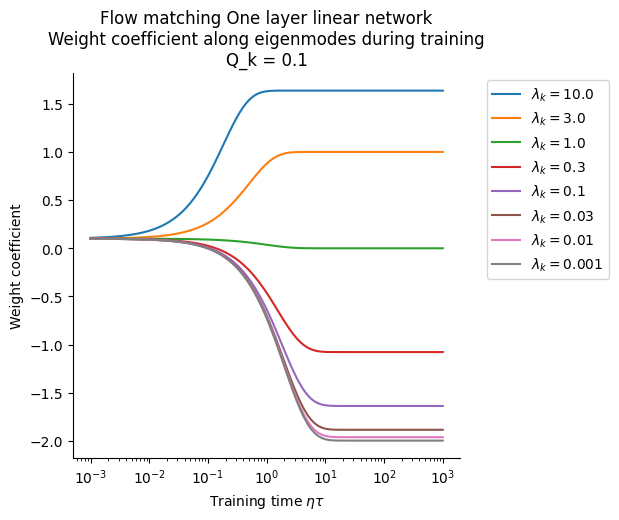

In [87]:
t = 0.5
Q_k = 0.1
figh = plt.figure(figsize=(5, 5))
tau_vec = np.logspace(-3, 3, 100)
lambda_vec = reversed([0.001, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0])
for lambda_k in lambda_vec:
    result = compute_weight_coefficient_flowmatching_onelayer(tau_vec, t, lambda_k, Q_k)
    plt.semilogx(tau_vec, result, label=f'$\lambda_k=${lambda_k}')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel(r'Training time $\eta$$\tau$')
plt.ylabel('Weight coefficient')
plt.title(f'Flow matching One layer linear network\nWeight coefficient along eigenmodes during training\nQ_k = {Q_k}')
saveallforms(FMfigdir, f'one_layer_linear_flowmatching_weight_coefficient_lrncrv_Qinit{Q_k}', figh)
plt.show()

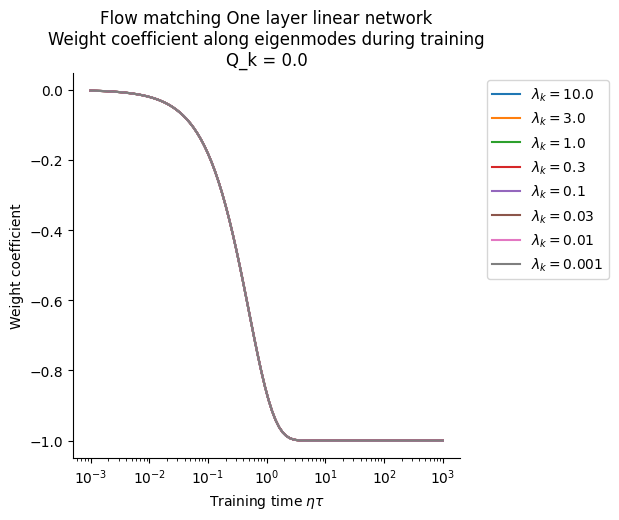

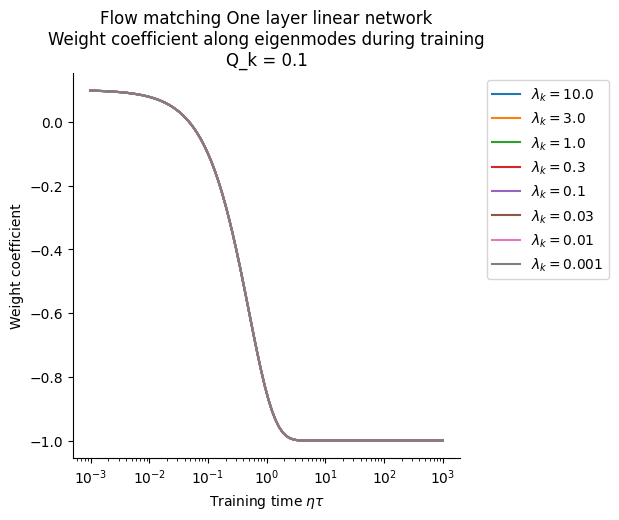

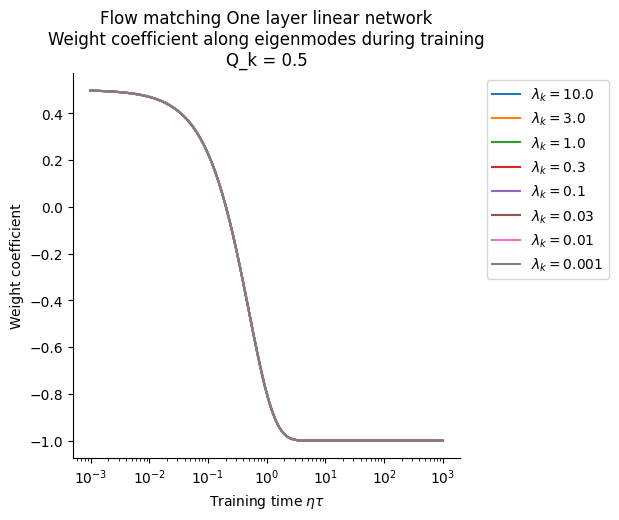

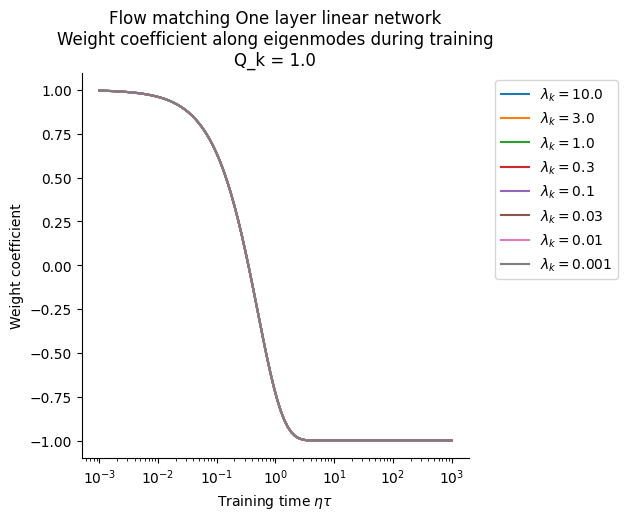

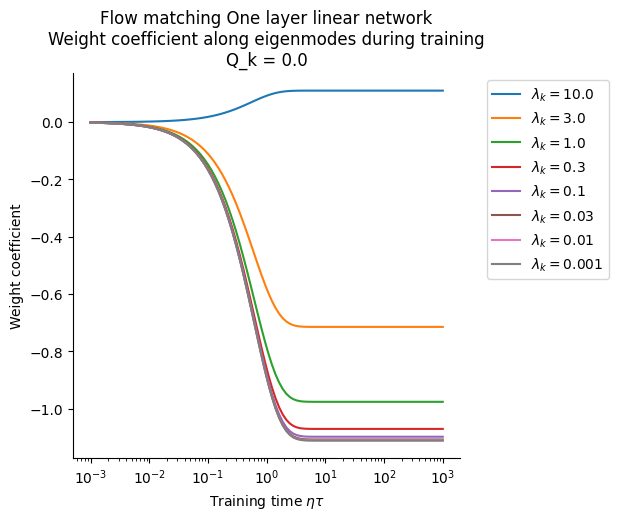

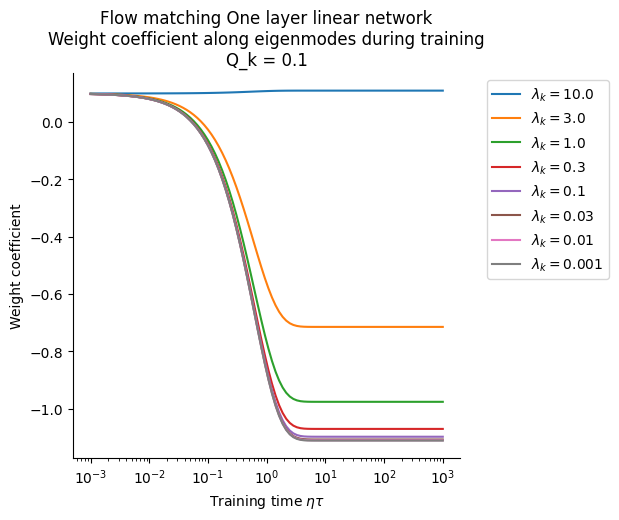

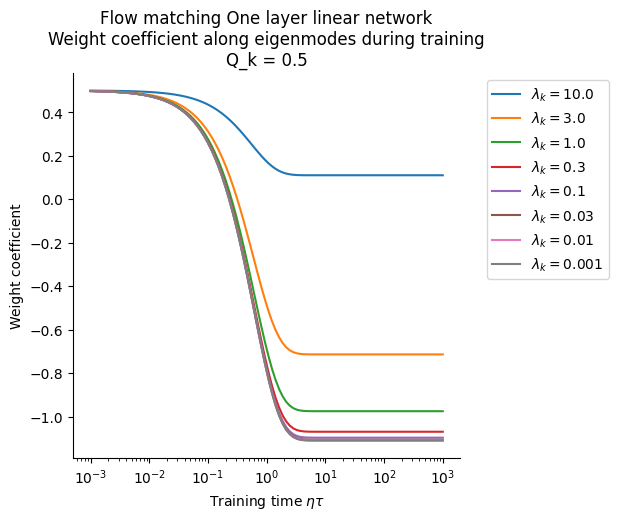

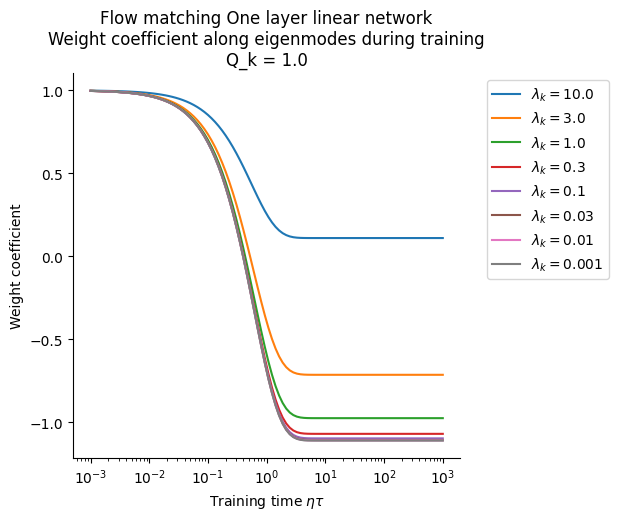

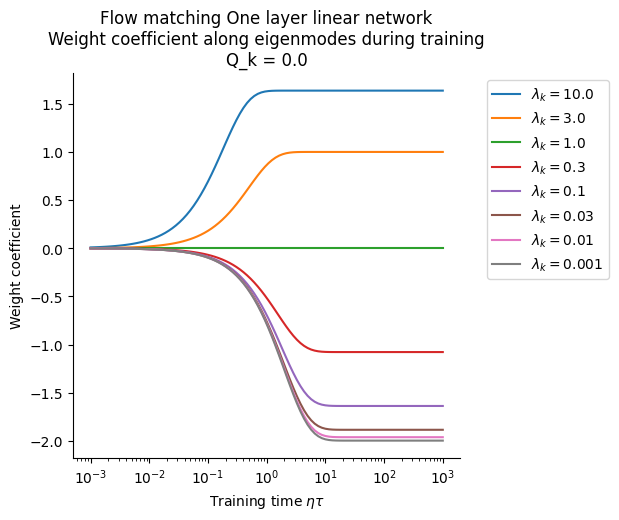

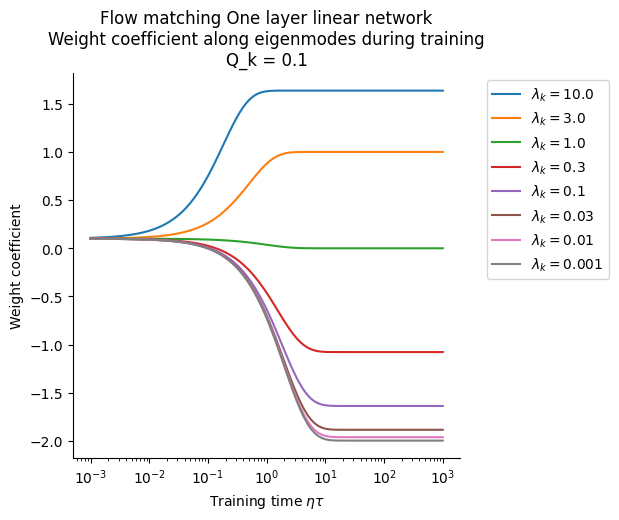

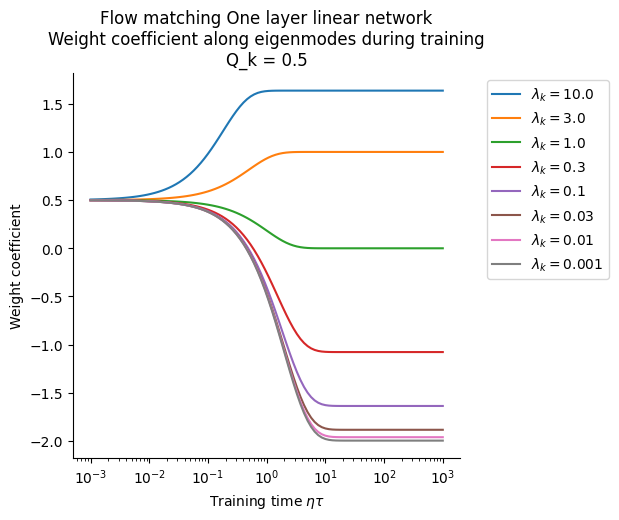

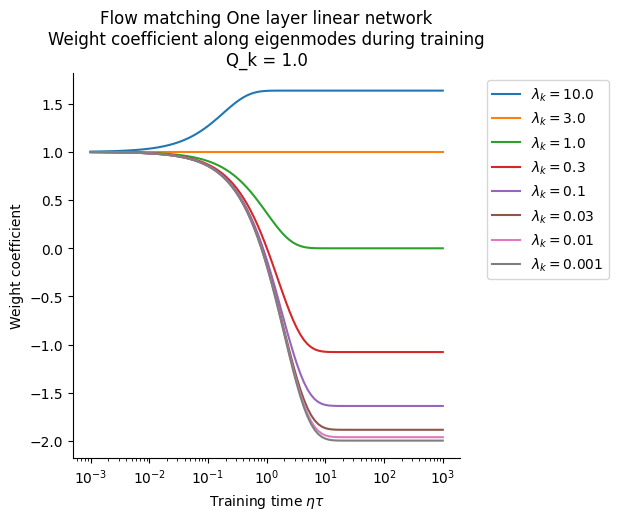

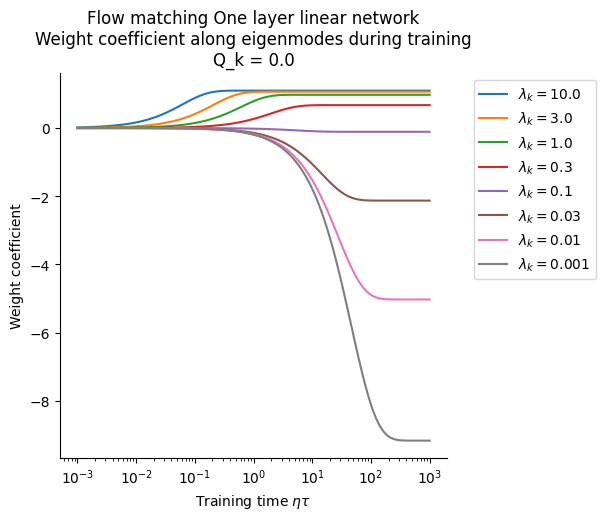

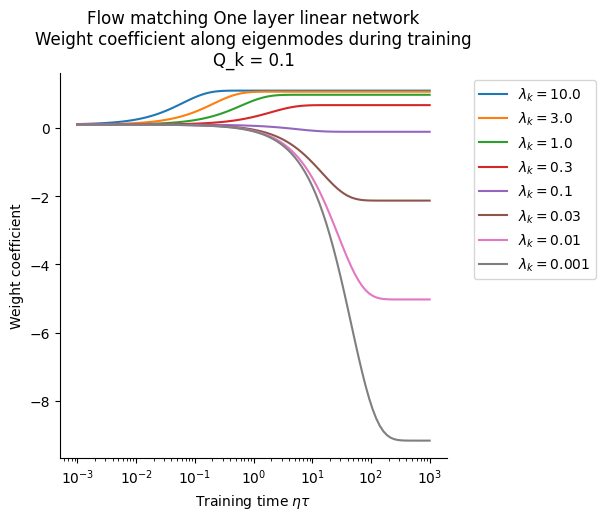

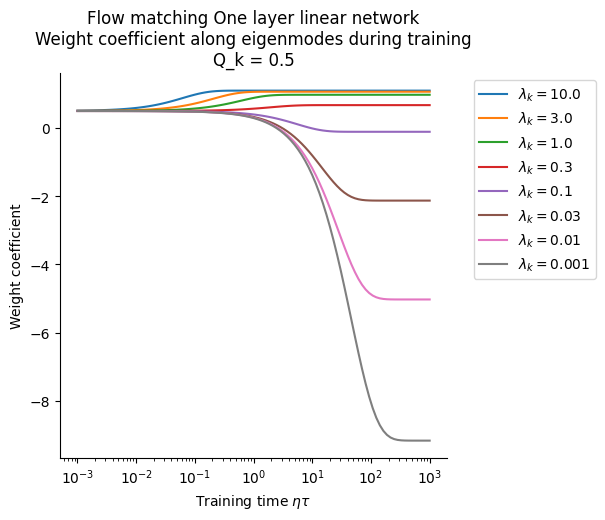

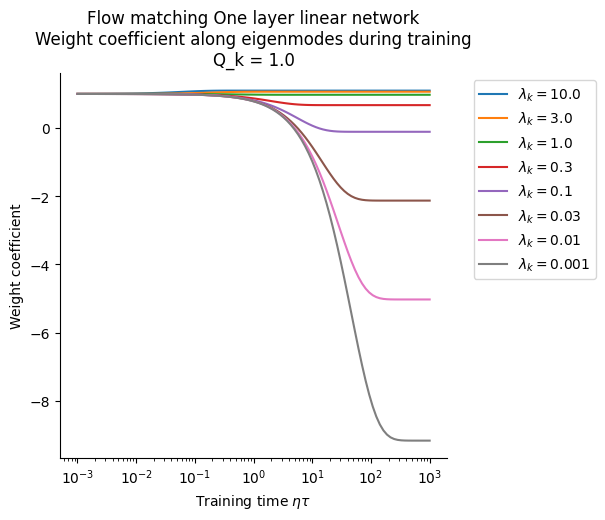

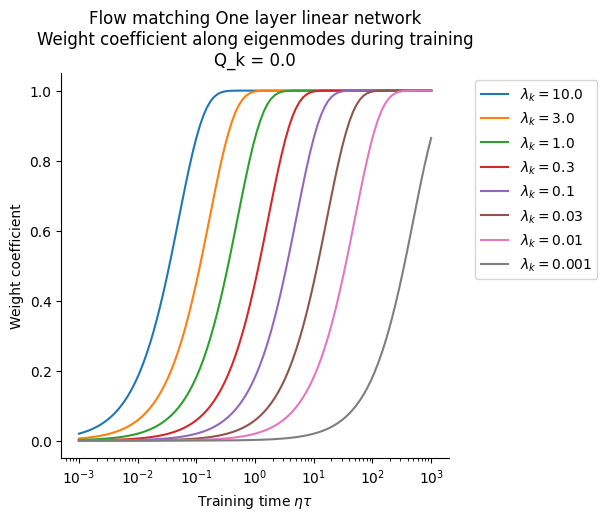

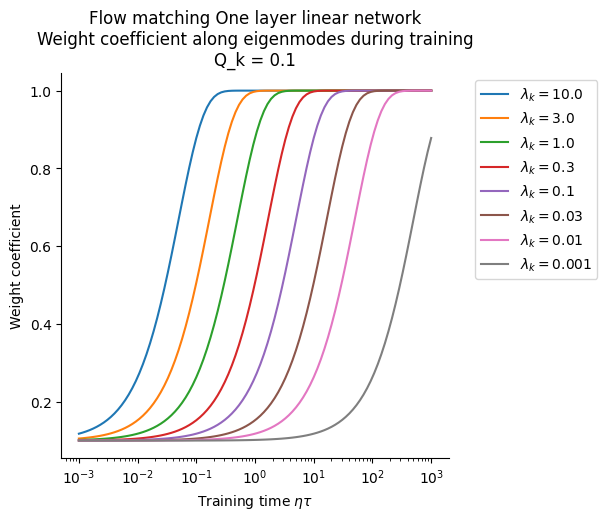

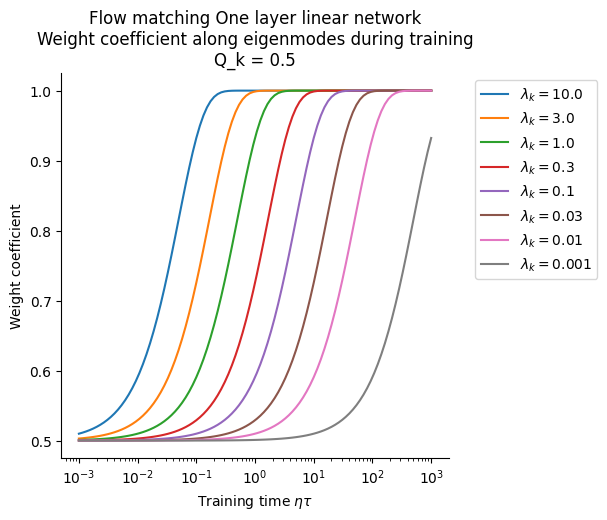

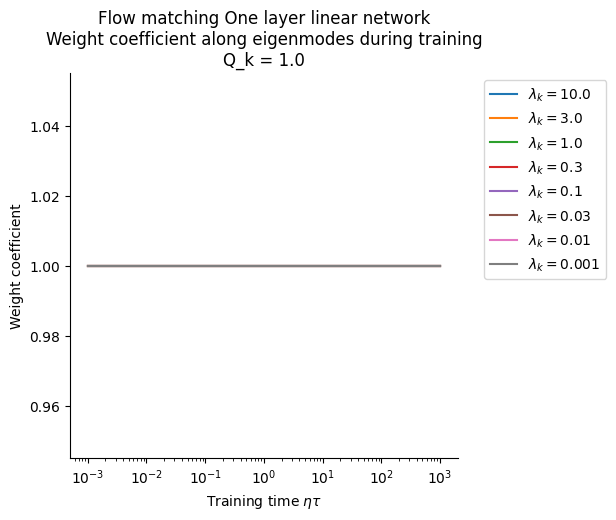

In [88]:
t = 0.5
Q_k = 0.1
for t in [0.0, 0.01, 0.1, 0.5, 0.9, 0.99, 1.0]:
    for Q_k in [0.0, 0.1, 0.5, 1.0]:
        figh = plt.figure(figsize=(5, 5))
        tau_vec = np.logspace(-3, 3, 100)
        lambda_vec = reversed([0.001, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0])
        for lambda_k in lambda_vec:
            result = compute_weight_coefficient_flowmatching_onelayer(tau_vec, t, lambda_k, Q_k)
            plt.semilogx(tau_vec, result, label=f'$\lambda_k=${lambda_k}')

        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xlabel(r'Training time $\eta$$\tau$')
        plt.ylabel('Weight coefficient')
        plt.title(f'Flow matching One layer linear network\nWeight coefficient along eigenmodes during training\nQ_k = {Q_k} t = {t}')
        saveallforms(FMfigdir, f'one_layer_linear_flowmatching_weight_coefficient_lrncrv_Qinit{Q_k}_t{t}', figh)
        plt.show()

### Distribution dynamics

In [66]:
import numpy as np
from scipy.special import expi, erf
import matplotlib.pyplot as plt
import seaborn as sns
from circuit_toolkit.plot_utils import saveallforms

In [4]:
import math
import numpy as np
from scipy.special import expi, erf

def compute_integral_flowmatching_onelayer(tau, lambda_k, Q_k, eta=1.0):
    """
    Computes the expression:
    
        1/2*log(lambda_k) 
      + 1/2*(Ei(-2*eta*tau) - Ei(-2*eta*tau*lambda_k))
      + 1/2*sqrt(pi/(2*eta*tau*(lambda_k+1))) * Q_k * exp(-2*eta*tau*lambda_k/(lambda_k+1)) 
          * (erf(sqrt(2*eta*tau/(lambda_k+1))) + erf(lambda_k*sqrt(2*eta*tau/(lambda_k+1))))
    
    Parameters:
        tau      : float, main argument.
        lambda_k : float, parameter in the formula.
        Q_k      : float, parameter in the formula.
        eta      : float, default is 1.0.
    
    Returns:
        The computed value of the expression.
    """
    tau = np.asarray(tau, dtype=float)
    # Term 1: 1/2*log(lambda_k)
    term1 = 0.5 * np.log(lambda_k)
    # Term 2: 1/2*(Ei(-2*eta*tau) - Ei(-2*eta*tau*lambda_k))
    term2 = 0.5 * (expi(-2 * eta * tau) - expi(-2 * eta * tau * lambda_k))
    # Common factor used in term 3:
    common_factor = np.sqrt(np.pi / (2 * eta * tau * (lambda_k + 1)))
    # Exponential term in term 3:
    exp_term = np.exp(-2 * eta * tau * lambda_k / (lambda_k + 1))
    # Error function sum in term 3:
    sqrt_factor = np.sqrt(2 * eta * tau / (lambda_k + 1))
    erf_sum = erf(sqrt_factor) + erf(lambda_k * sqrt_factor)
    # Term 3:
    term3 = 0.5 * common_factor * Q_k * exp_term * erf_sum
    return term1 + term2 + term3

def compute_target_variance_flowmatching_onelayer(tau, lambda_k, Q_k, eta=1.0):
    integral = compute_integral_flowmatching_onelayer(tau, lambda_k, Q_k, eta)
    return np.exp(2 * integral)

# Example usage:
if __name__ == '__main__':
    # Example values for the parameters
    tau = 5.0
    lambda_k = 3.0
    Q_k = 1.5
    # eta is defaulted to 1.0, but can be set if needed
    
    result = compute_target_variance_flowmatching_onelayer(tau, lambda_k, Q_k)
    print("The result of the computation is:", result)

The result of the computation is: 3.0013651745392087


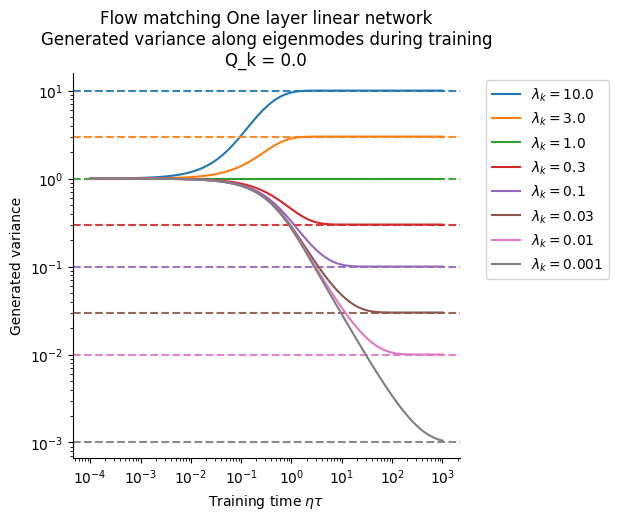

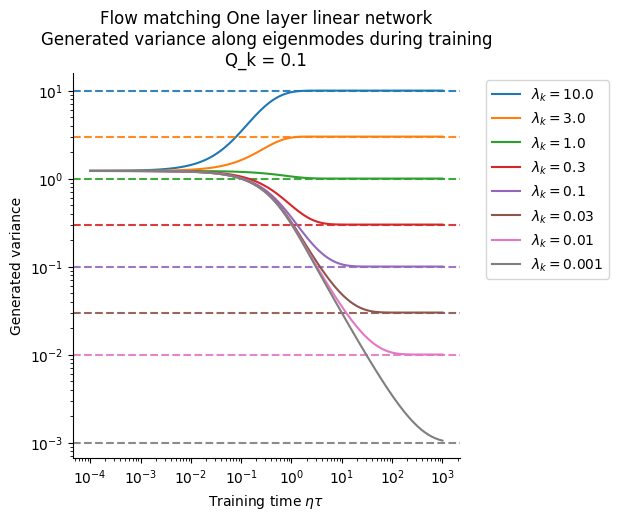

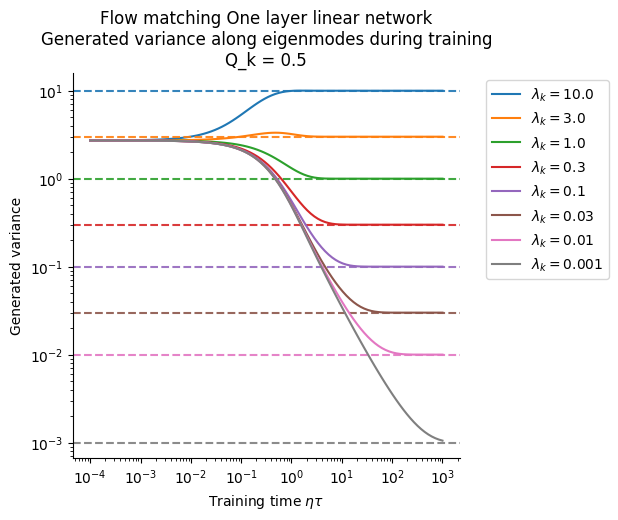

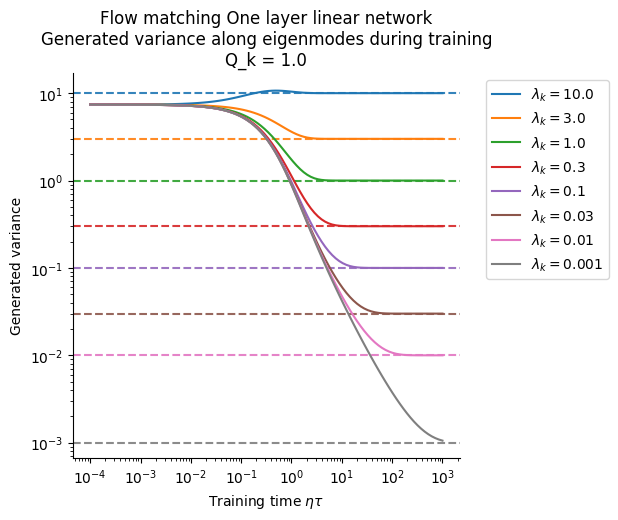

In [80]:
for Q_k in [0.0, 0.1, 0.5, 1.0]:
    tau_vec = np.logspace(-4, 3, 100)
    lambda_vec = reversed([0.001, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0])
    figh = plt.figure(figsize=(5, 5))
    for i, lambda_k in enumerate(lambda_vec):
        result = compute_target_variance_flowmatching_onelayer(tau_vec, lambda_k, Q_k)
        plt.loglog(tau_vec, result, label=f'$\lambda_k=${lambda_k}')
        plt.axhline(y=lambda_k, color=f"C{i}", linestyle='--', alpha=0.9)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel(r'Training time $\eta$$\tau$')
    plt.ylabel('Generated variance')
    plt.title(f'Flow matching One layer linear network\nGenerated variance along eigenmodes during training\nQ_k = {Q_k}')
    saveallforms(FMfigdir, f'one_layer_linear_flowmatching_generated_variance_lrncrv_Qinit{Q_k}', figh)
    plt.show()

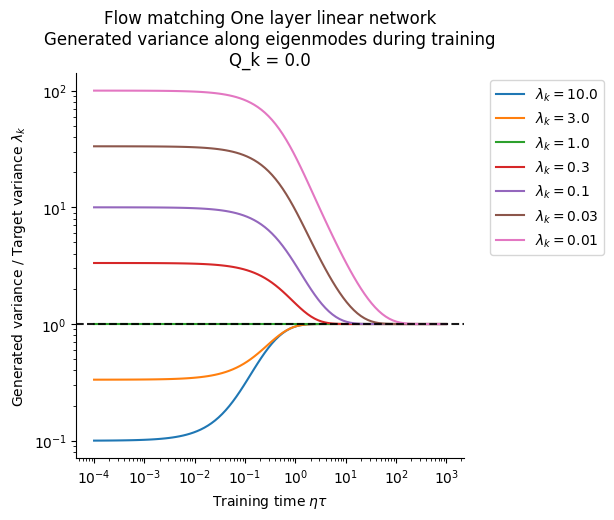

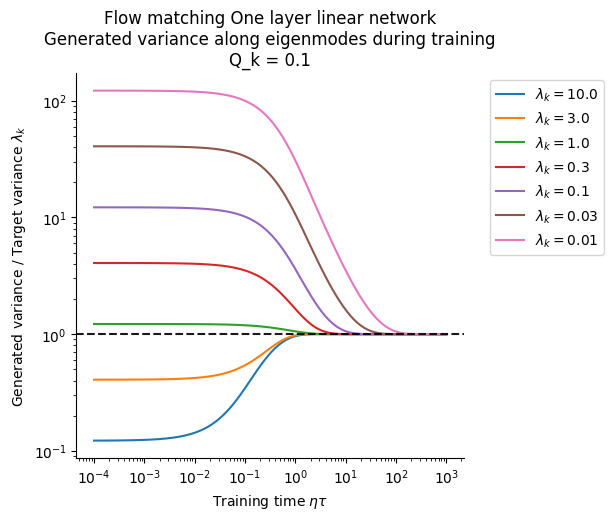

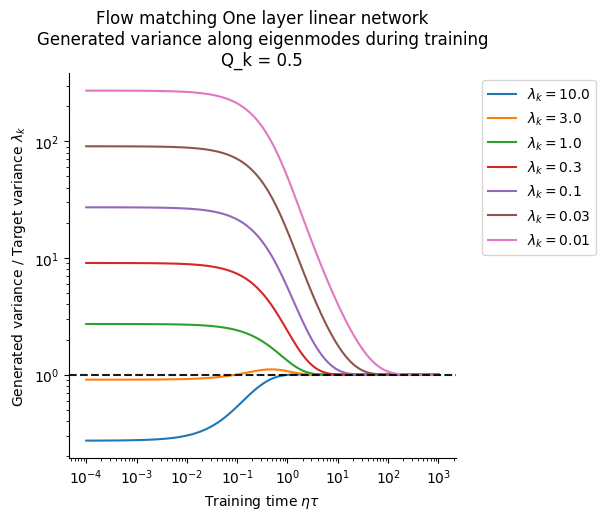

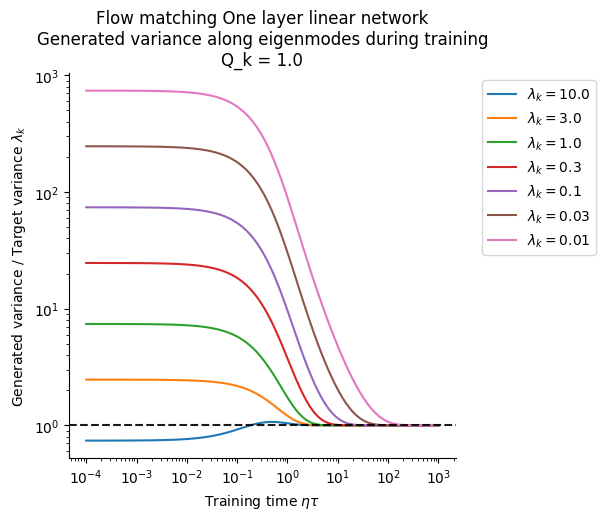

In [82]:
for Q_k in [0.0, 0.1, 0.5, 1.0]:
    tau_vec = np.logspace(-4, 3, 100)
    lambda_vec = reversed([0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0])
    figh = plt.figure(figsize=(5, 5))
    for lambda_k in lambda_vec:
        result = compute_target_variance_flowmatching_onelayer(tau_vec, lambda_k, Q_k)
        plt.loglog(tau_vec, result / lambda_k, label=f'$\lambda_k=${lambda_k}')
    plt.axhline(y=1, color='black', linestyle='--', alpha=0.9)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel(r'Training time $\eta$$\tau$')
    plt.ylabel('Generated variance / Target variance $\lambda_k$')
    plt.title(f'Flow matching One layer linear network\nGenerated variance along eigenmodes during training\nQ_k = {Q_k}')
    saveallforms(FMfigdir, f'one_layer_linear_flowmatching_generated_variance_normalized_lrncrv_Qinit{Q_k}', figh)
    plt.show()

### Emergence time scaling curve

In [51]:
import sys
sys.path.append('/Users/binxuwang/Github/DiffusionLearningCurve')
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from core.trajectory_convergence_lib import compute_crossing_points, analyze_and_plot_variance
from circuit_toolkit.plot_utils import saveallforms

In [52]:
figdir = '/Users/binxuwang/Library/CloudStorage/OneDrive-HarvardUniversity/Manuscript_DiffusionLearningCurve/Figures/Figure_theory_curves/theory_figures'

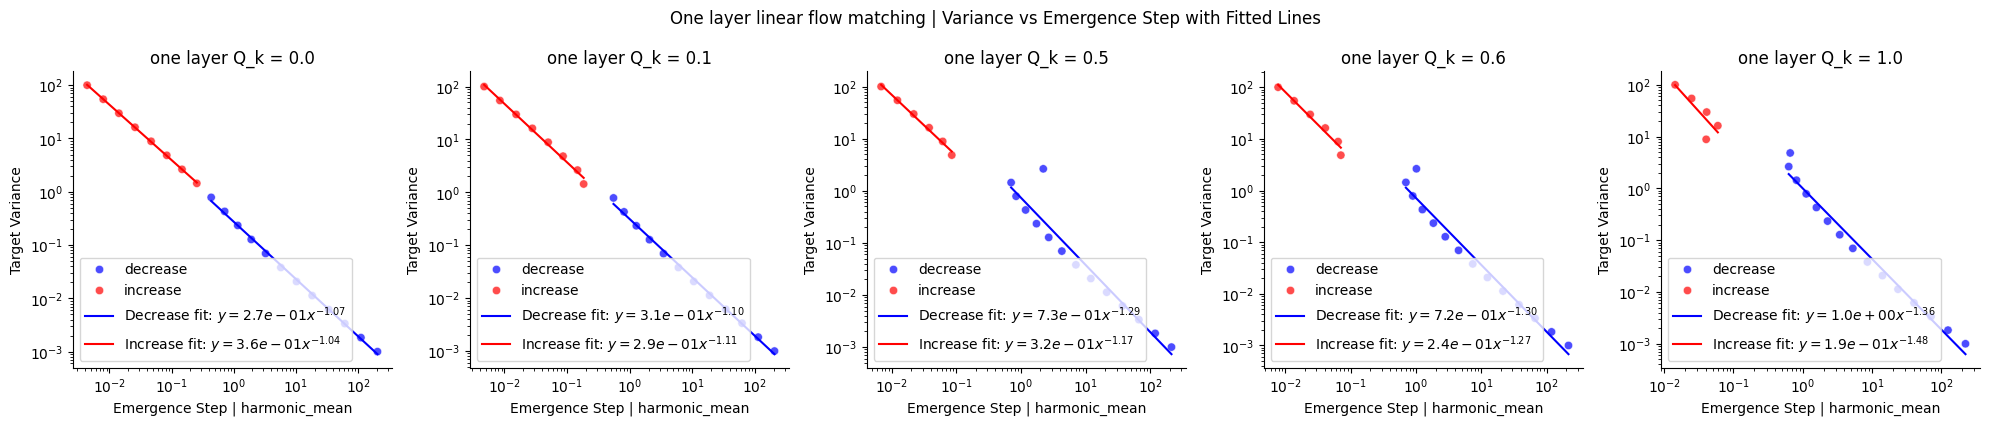

In [54]:
eta = 1
tau_curve = np.logspace(-4, 3, 1000)
lambdak_list = np.logspace(-3, 2, 20)
threshold_type = "harmonic_mean"
model_label = "one layer"
figh, axs = plt.subplots(1, 5, figsize=(20, 4.3))
for qi, q_k in enumerate([0.0, 0.1, 0.5, 0.6, 1.0]):
    var_curves = [compute_target_variance_flowmatching_onelayer(tau_curve, lambda_k, q_k) for lambda_k in lambdak_list]
    var_curve_stack = np.stack(var_curves, axis=1)
    df = compute_crossing_points(torch.tensor(lambdak_list), var_curve_stack, tau_curve, smooth_sigma=2, threshold_type=threshold_type, threshold_fraction=0.2)
    fig = analyze_and_plot_variance(df, x_col='emergence_step', y_col='Variance', hue_col='Direction', palette={"increase": "red", "decrease": "blue"}, 
                        log_x=True, log_y=True, figsize=(5, 5), fit_label_format='{direction} fit: $y = {a:.1e}x^{{{b:.2f}}}$', 
                        annotate=False, annotate_offset=(0, 0), title=f'{model_label} Q_k = {q_k}', 
                        xlabel=f'Emergence Step | {threshold_type}', ylabel='Target Variance', alpha=0.7, fit_line_kwargs=None, scatter_kwargs=None,
                        ax=axs[qi])
        
fig.suptitle(f"One layer linear flow matching | Variance vs Emergence Step with Fitted Lines")
fig.tight_layout()
saveallforms(figdir, f'one_layer_linear_lrncrv_flowmatching_var_vs_emergence_step_scaling_synopsis_threshold{threshold_type}', fig)
plt.show()

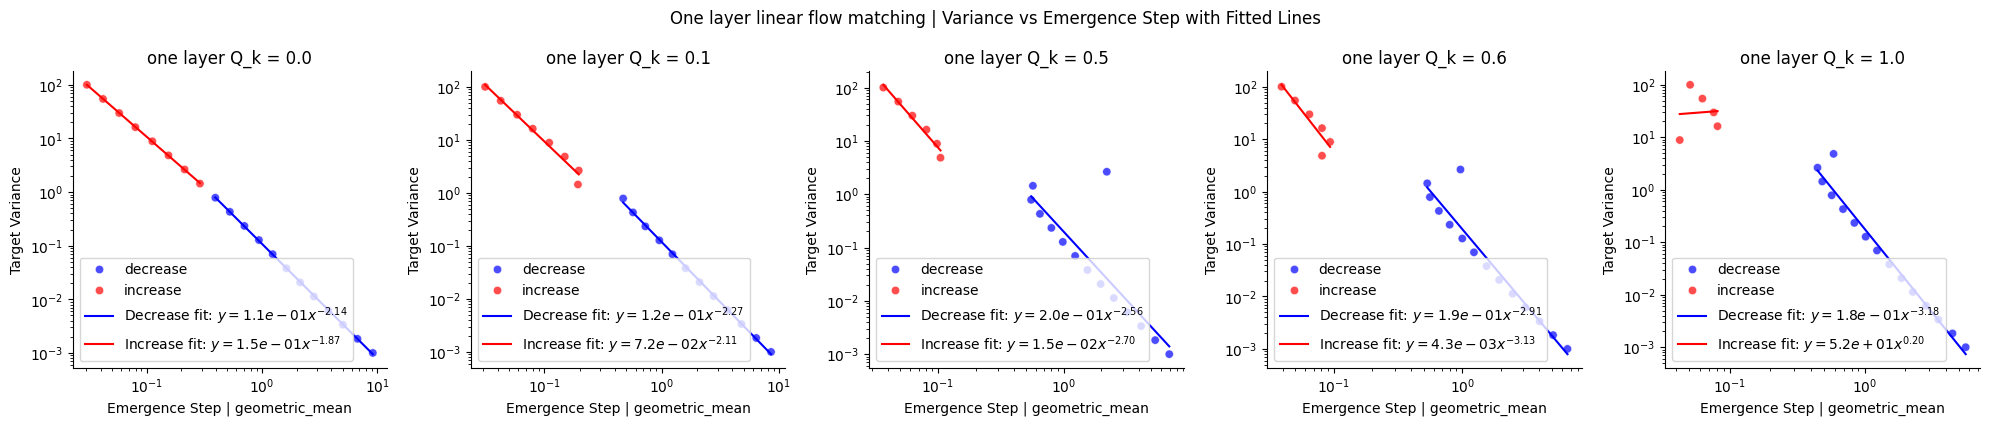

In [55]:
eta = 1
tau_curve = np.logspace(-4, 3, 1000)
lambdak_list = np.logspace(-3, 2, 20)
threshold_type = "geometric_mean"
model_label = "one layer"
figh, axs = plt.subplots(1, 5, figsize=(20, 4.3))
for qi, q_k in enumerate([0.0, 0.1, 0.5, 0.6, 1.0]):
    var_curves = [compute_target_variance_flowmatching_onelayer(tau_curve, lambda_k, q_k) for lambda_k in lambdak_list]
    var_curve_stack = np.stack(var_curves, axis=1)
    df = compute_crossing_points(torch.tensor(lambdak_list), var_curve_stack, tau_curve, smooth_sigma=2, threshold_type=threshold_type, threshold_fraction=0.2)
    fig = analyze_and_plot_variance(df, x_col='emergence_step', y_col='Variance', hue_col='Direction', palette={"increase": "red", "decrease": "blue"}, 
                        log_x=True, log_y=True, figsize=(5, 5), fit_label_format='{direction} fit: $y = {a:.1e}x^{{{b:.2f}}}$', 
                        annotate=False, annotate_offset=(0, 0), title=f'{model_label} Q_k = {q_k}', 
                        xlabel=f'Emergence Step | {threshold_type}', ylabel='Target Variance', alpha=0.7, fit_line_kwargs=None, scatter_kwargs=None,
                        ax=axs[qi])
        
fig.suptitle(f"One layer linear flow matching | Variance vs Emergence Step with Fitted Lines")
fig.tight_layout()
saveallforms(figdir, f'one_layer_linear_lrncrv_flowmatching_var_vs_emergence_step_scaling_synopsis_threshold{threshold_type}', fig)
plt.show()

### Scratch

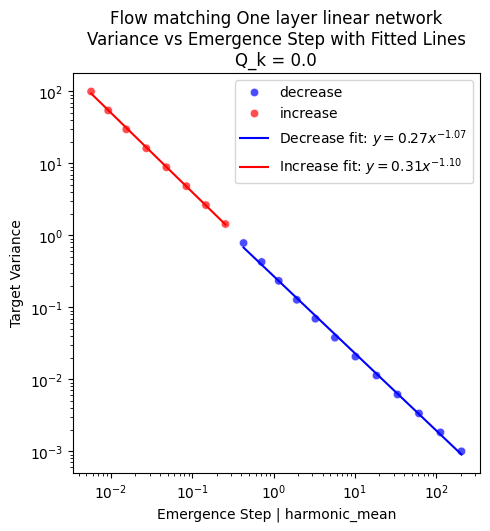

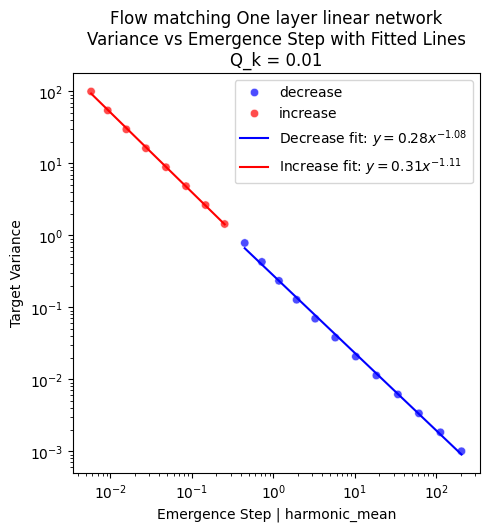

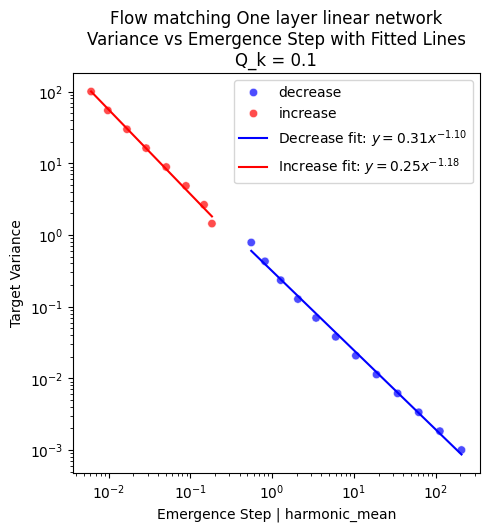

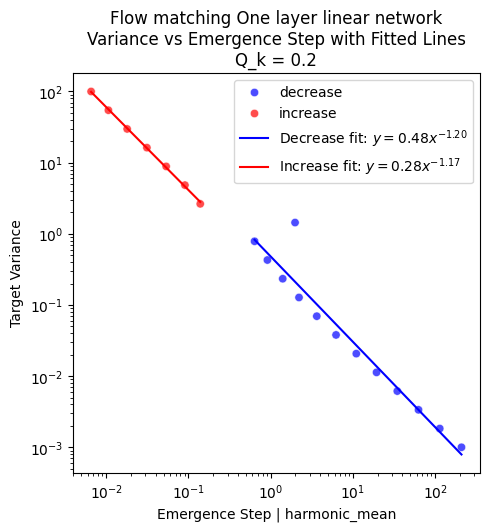

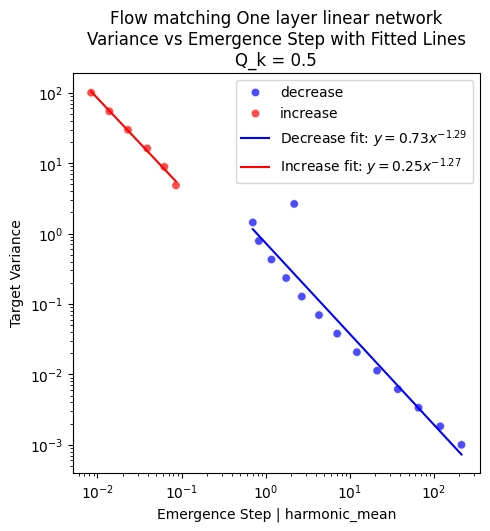

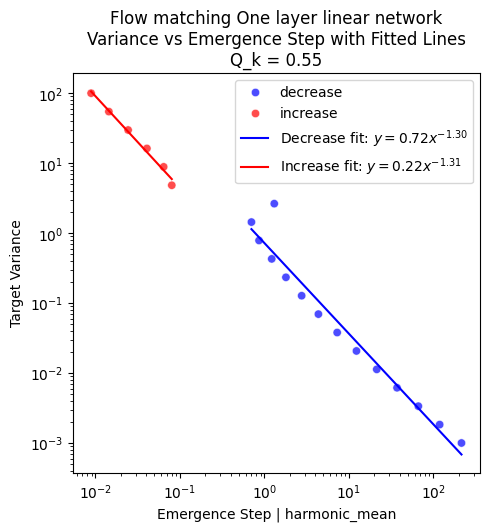

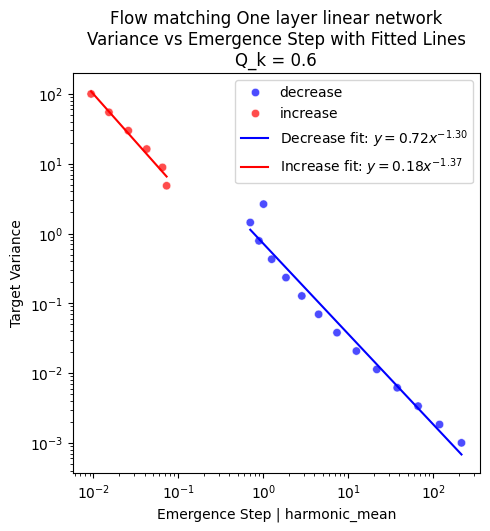

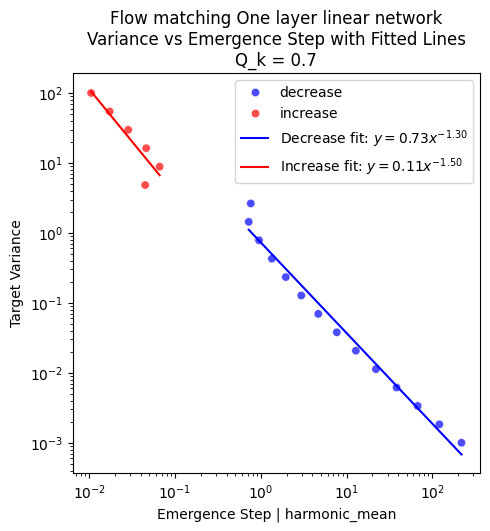

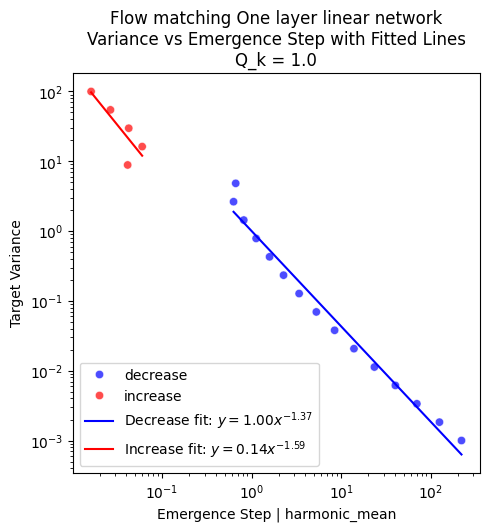

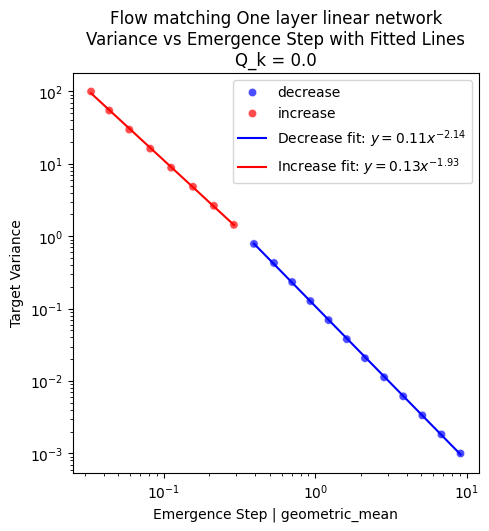

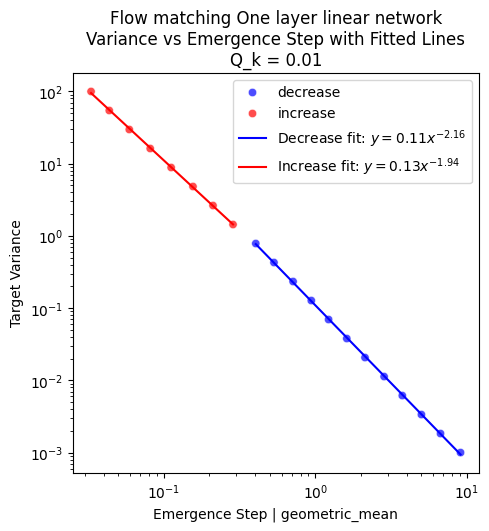

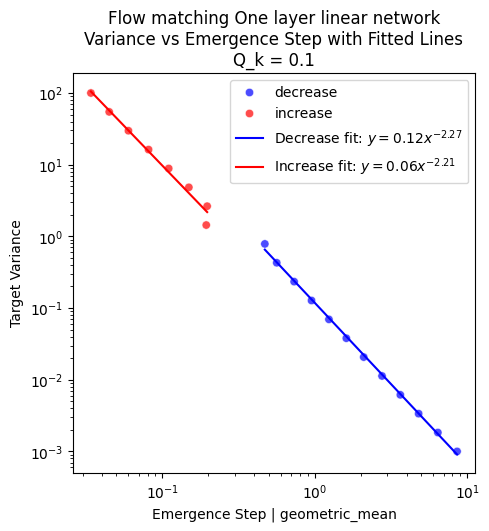

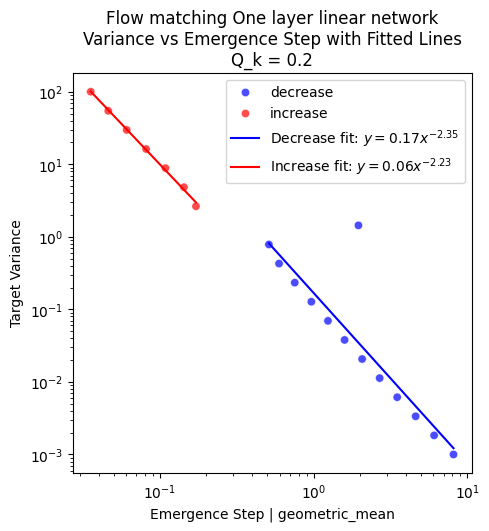

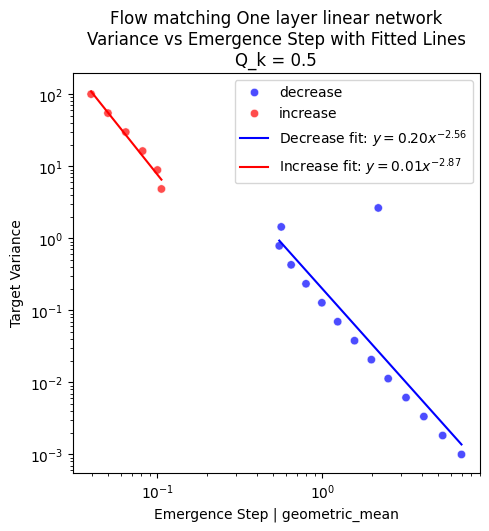

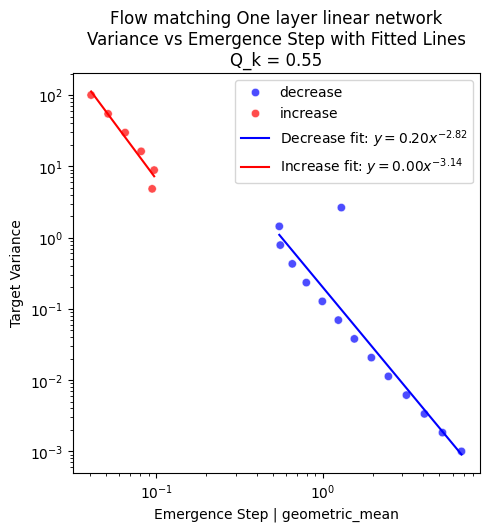

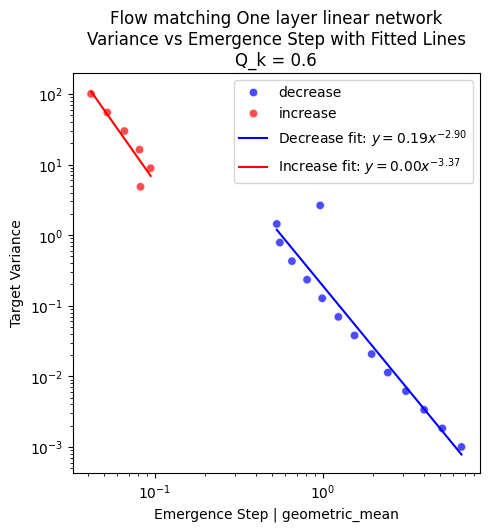

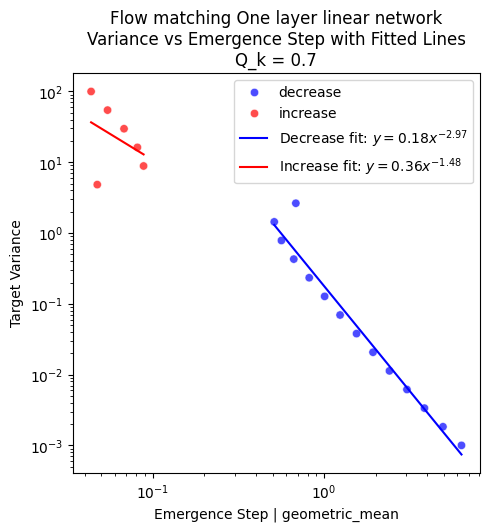

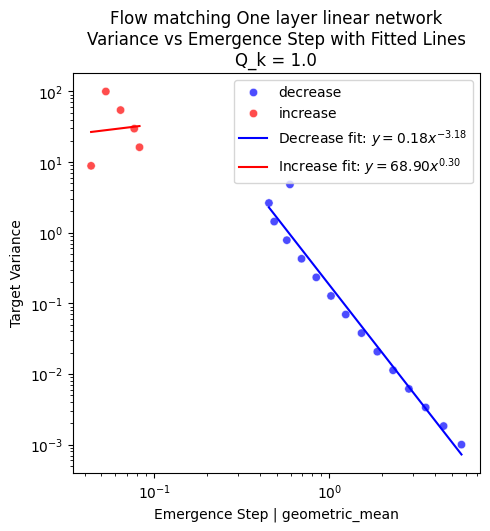

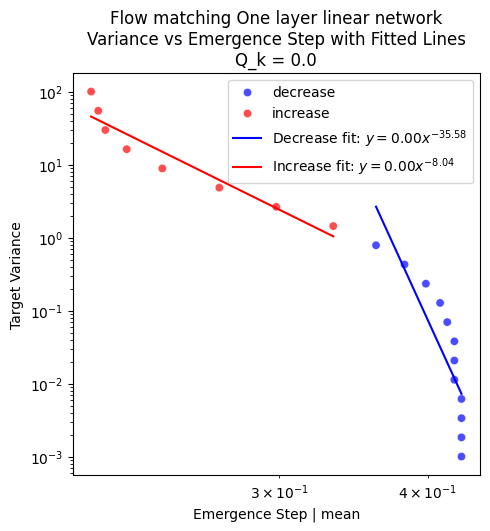

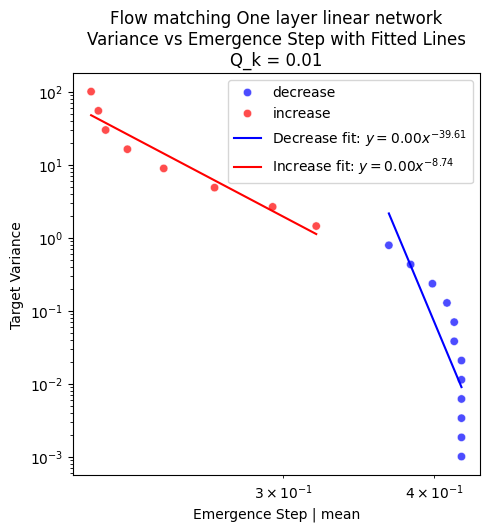

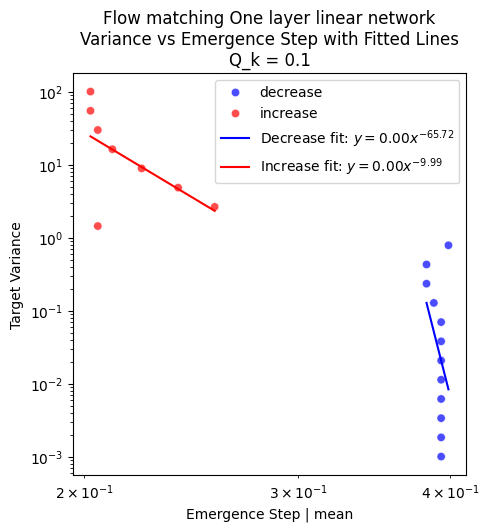

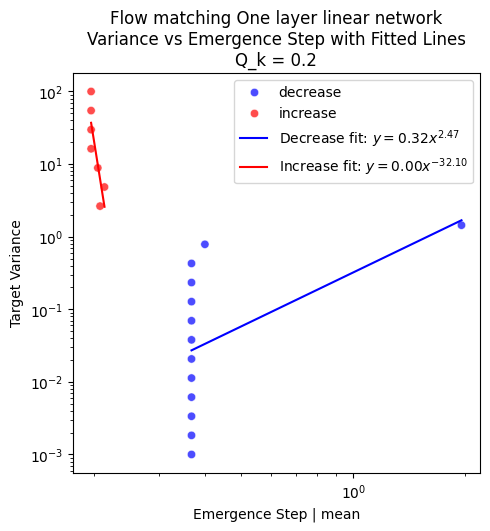

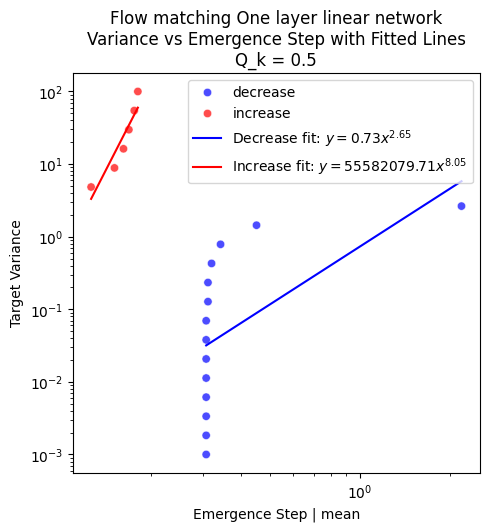

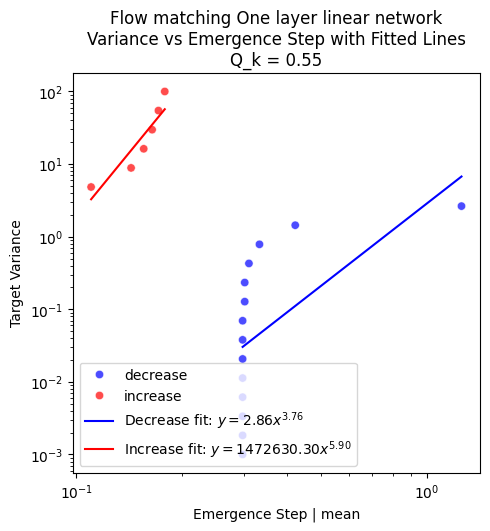

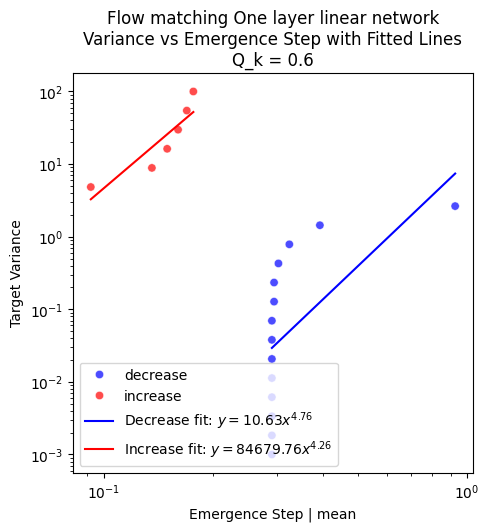

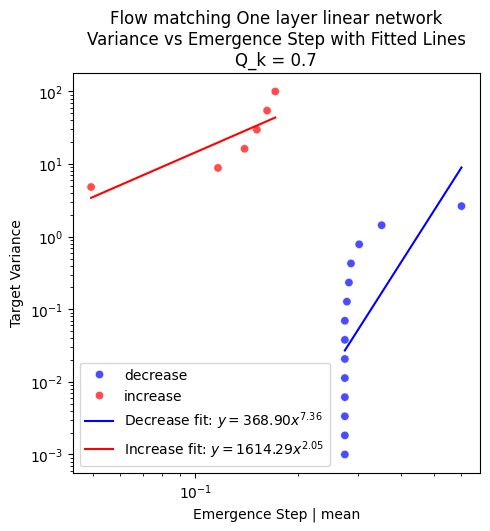

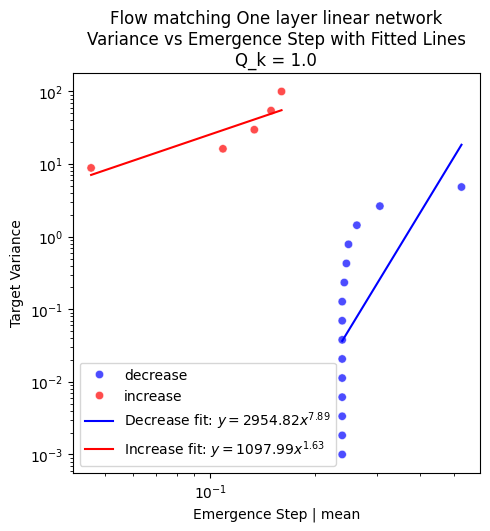

In [15]:
tau_curve = np.logspace(-3, 3, 1000)
lambdak_list = np.logspace(-3, 2, 20)
for threshold_type in ["harmonic_mean", "geometric_mean", "mean", ]:
    for q_k in [0.0, 0.01, 0.1, 0.2, 0.5, 0.55, 0.6, 0.7, 1.0]:
        var_curves = [compute_target_variance_flowmatching_onelayer(tau_curve, lambda_k, q_k) for lambda_k in lambdak_list]
        var_curve_stack = np.stack(var_curves, axis=1)
        df = compute_crossing_points(torch.tensor(lambdak_list), var_curve_stack, tau_curve, smooth_sigma=2, threshold_type=threshold_type, threshold_fraction=0.2)
        fig = analyze_and_plot_variance(df, x_col='emergence_step', y_col='Variance', hue_col='Direction', palette={"increase": "red", "decrease": "blue"}, 
                            log_x=True, log_y=True, figsize=(5, 5), fit_label_format='{direction} fit: $y = {a:.2f}x^{{{b:.2f}}}$', 
                            annotate=False, annotate_offset=(0, 0), title='Variance vs Emergence Step with Fitted Lines', 
                            xlabel=f'Emergence Step | {threshold_type}', ylabel='Target Variance', alpha=0.7, fit_line_kwargs=None, scatter_kwargs=None)
        fig.gca().set_title(f"Flow matching One layer linear network\nVariance vs Emergence Step with Fitted Lines\nQ_k = {q_k}")
        # saveallforms(figdir, f'onelayer_linear_lrncrv_diffusion_var_vs_emergence_step_scaling_Qinit{q_k}_threshold{threshold_type}', fig)
        plt.show()